В задачах используйте модель линейной регрессии из библиотеки sklearn:

from sklearn.linear_model import LinearRegression

Обучение модели выполняйте с настройками по умолчанию (с аргументами по умолчанию при создании объекта класса LinearRegression):  LinearRegression().fit(X, y)

# Задание 1

Перед вами результаты наблюдений длительности нахождения человека в очереди в зависимости от количества людей в этой очереди.

id,X,Y

1,6,12

2,25,52

3,4,16

4,18,35

5,3,6

6,7,16

7,17,32

8,12,21

9,13,22

10,5,8

Обучите модель линейной регрессии для прогнозирования и введите указанные параметры.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('dataset_3.csv', sep=',', index_col='id')
df

,X,Y
id,,
1,6,12
2,25,52
3,4,16
4,18,35
5,3,6
6,7,16
7,17,32
8,12,21
9,13,22


In [ ]:
X = df['X'].values.reshape(-1, 1)
y = df['Y']

In [ ]:
reg = LinearRegression().fit(X, y)

Определите выборочное среднее $\overline{X}$:

In [ ]:
X.mean()

11.0

Определите выборочное среднее $\overline{Y}$:

In [ ]:
y.mean()

22.0

Найдите коэффициент $\theta_{1}$:

In [ ]:
teta_1 = reg.coef_[0]
print(round(teta_1, 2))

1.89


Найдите коэффициент $\theta_{0}$:

In [ ]:
teta_0 = reg.intercept_
print(round(teta_0, 2))

1.25


Оцените точность модели, вычислив $\mathrm{R}^{2}$ статистику:

In [ ]:
r_score = reg.score(X,y)
print(round(r_score, 2))

0.94


# Задание 2

Представленный набор данных — это набор данных о семи различных типах рыб, продаваемых в некоторой рыбной лавке. Наша цель заключается в том, чтобы предсказать массу рыбы по каким-то косвенным признакам, известным о рыбе. Сами признаки, быть может, нужно синтезировать из тех, что известны.

Импорт библиотек

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Всего датасет содержит 159 записей. Мы предварительно зарезервировали часть датасета для задания по преодолению бейслайна (baseline). В настоящем задании подразумевается работа с датасетом, содержащим 119 записей.

In [ ]:
fish_data = pd.read_csv('fish_train.csv', sep=',')
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
...,...,...,...,...,...,...,...
114,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
115,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
116,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
117,Perch,120.0,20.0,22.0,23.5,6.1100,3.4075


При помощи train_test_split() разбейте набор данных на обучающую и тестовую выборки с параметрами test_size=0.2, random_state=9. Используйте стратификацию по колонке Species. Стратификация позволит сохранить доли представленных объектов (по представителям типов рыб) в тренировочной и тестовой выборках.

In [ ]:
fish_train, fish_test = train_test_split(fish_data, test_size=0.2, random_state=9, stratify=fish_data['Species'])

Вычислите выборочное среднее колонки <code>Width</code> полученной тренировочной выборки.

In [ ]:
print(round(fish_train['Width'].mean(), 3))

4.435


## 1. Построение базовой модели

Избавьтесь от категориальных признаков и обучите модель линейной регрессии (<code>LinearRegression()</code>) на тренировочном наборе данных. Выполните предсказания для тестового набора данных. Оцените модель при помощи метрики <code>r2_score()</code>.

In [ ]:
X_train = fish_train[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y_train = fish_train['Weight']
X_test = fish_test[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y_test = fish_test['Weight']
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(round(r2_score(y_test, y_pred), 3))

0.839


## 2. Добавление предварительной обработки признаков.

### Использование PCA

При помощи, например, <code>sns.heatmap()</code>, постройте матрицу корреляций признаков тренировочного набора данных и определите тройку наиболее коррелированных между собой признаков.

<Axes: >

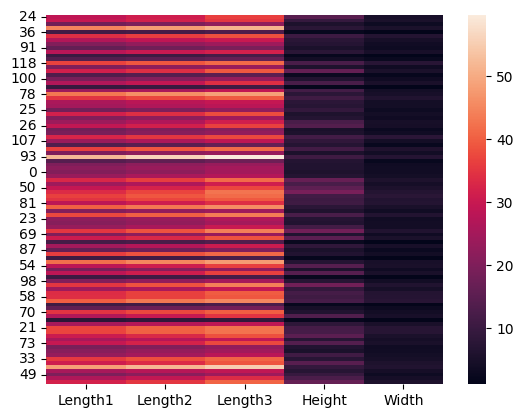

In [ ]:
sns.heatmap(X_train)

Линейные модели достаточно плохо реагируют на коррелированные признаки, поэтому от таких признаков имеет смысл избавиться еще до начала обучения.

Для уменьшения количества неинформативных измерений используйте метод главных компонент.

1) Примените метод главных компонент (<code>PCA(n_components=3, svd_solver='full')</code>) для трех найденных наиболее коррелированных признаков.

2) Вычислите долю объясненной дисперсии при использовании только первой главной компоненты.

3) Замените три наиболее коррелированных признака на новый признак <code>Lengths</code>, значения которого совпадают со значениями счетов первой главной компоненты.

In [ ]:
pca = PCA(n_components=3, svd_solver='full')
pca.fit(X_train[['Length1', 'Length2', 'Length3']])
print(round(pca.explained_variance_ratio_[0], 3))

0.996


In [ ]:
pca = PCA(n_components=1, svd_solver='full')
pca.fit(X_train[['Length1', 'Length2', 'Length3']])
X_train_pca = pd.DataFrame(data=pca.transform(X_train[['Length1', 'Length2', 'Length3']]), columns=['Length'], index=X_train.index)
X_train_pca['Height'] = X_train['Height'].values
X_train_pca['Width'] = X_train['Width'].values
X_train_pca.head(10)

,Length,Height,Width
24,6.271429,14.3714,4.8146
72,6.356849,9.4850,5.3550
46,-14.454194,5.6166,3.1746
55,33.940884,7.6800,5.3760
36,-28.379066,2.2139,1.2838
110,13.277949,10.6091,6.7408
39,0.205842,7.5852,4.6354
57,-10.558312,6.7920,3.6240
91,-18.417405,5.2224,3.3216
17,2.363445,7.6156,4.7716


Примените полученное преобразование для тех же признаков в тестовом наборе данных. Обратите внимание, что заново обучать преобразование `PCA` не нужно. Аналогично предыдущему этапу замените три рассмотренных признака на один.

In [ ]:
X_test_pca = pd.DataFrame(data=pca.transform(X_test[['Length1', 'Length2', 'Length3']]), columns=['Length'], index=X_test.index)
X_test_pca['Height'] = X_test['Height'].values
X_test_pca['Width'] = X_test['Width'].values
X_test_pca.head(10)

,Length,Height,Width
3,20.804169,18.7542,6.7497
40,-8.780652,10.3458,3.6636
96,13.060591,16.3618,6.0900
84,-28.148802,2.2044,1.1484
64,6.902797,10.0300,6.0180
85,23.302394,12.8002,6.8684
68,-24.280966,4.1472,2.2680
10,-13.151660,5.9175,3.3075
27,25.022776,12.5125,7.4165
83,12.953592,15.4686,6.1306


Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи <code>r2_score()</code>.

In [ ]:
reg = LinearRegression().fit(X_train_pca, y_train)
y_pred = reg.predict(X_test_pca)
print(round(r2_score(y_test, y_pred), 3))

0.833


### Модификация признаков

Постройте графики зависимостей признаков от целевой переменной, например, при помощи <code>sns.pairplot()</code>.

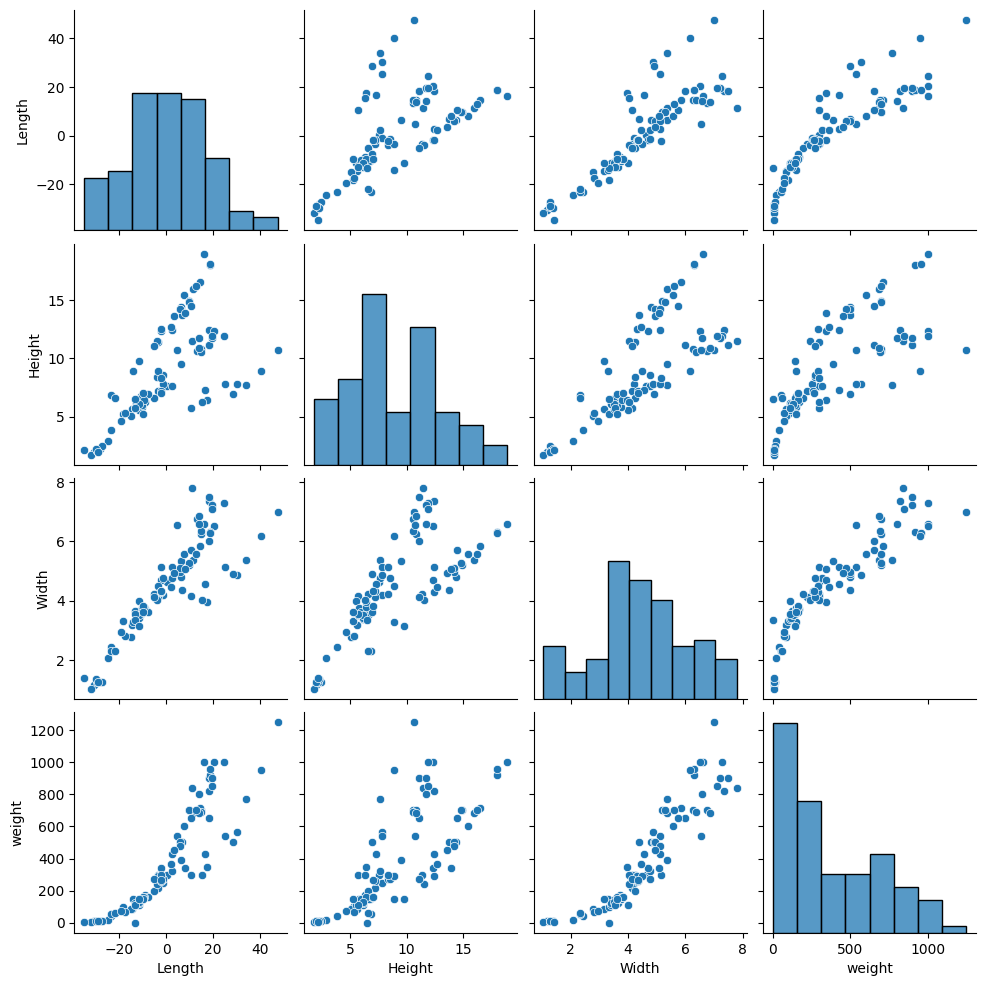

In [ ]:
train_df = X_train_pca.copy()
train_df['weight'] = y_train.copy()
sns.pairplot(train_df)

Видно, что масса, вообще говоря, нелинейно зависит от остальных параметров. Значит, чтобы линейная модель хорошо справлялась с предсказанием, признаки имеет смысл преобразовать так, чтобы зависимость стала более похожей на линейную. Но как придумать такую зависимость?

Логично предположить, что масса рыбы должна каким-то гладким образом зависеть от остальных параметров, отвечающих так или иначе за размеры. Если впомнить, что масса — это произведение плотности на объем, то

$$
m = \rho \cdot V.
$$

Допустим, что средняя плотность у всех рыб одинаковая, и вспомним, что при гомотетии объем объекта зависит от линейных размеров как куб, тогда получим

$$
m\sim V\sim d^3
$$

Все признаки тренировочного и тестового наборов данных, отвечающие так или иначе за размеры (<code>Height, Width, Lengths</code>), возведите в третью степень, и проверьте, стала ли зависимость массы от этих признаков похожа на линейную.

In [ ]:
X_train_pca['Height'] = np.power(X_train_pca['Height'], 3)
X_train_pca['Width'] = np.power(X_train_pca['Width'], 3)
X_train_pca['Length'] = np.power(X_train_pca['Length'], 3)
X_test_pca['Height'] = np.power(X_test_pca['Height'], 3)
X_test_pca['Width'] = np.power(X_test_pca['Width'], 3)
X_test_pca['Length'] = np.power(X_test_pca['Length'], 3)

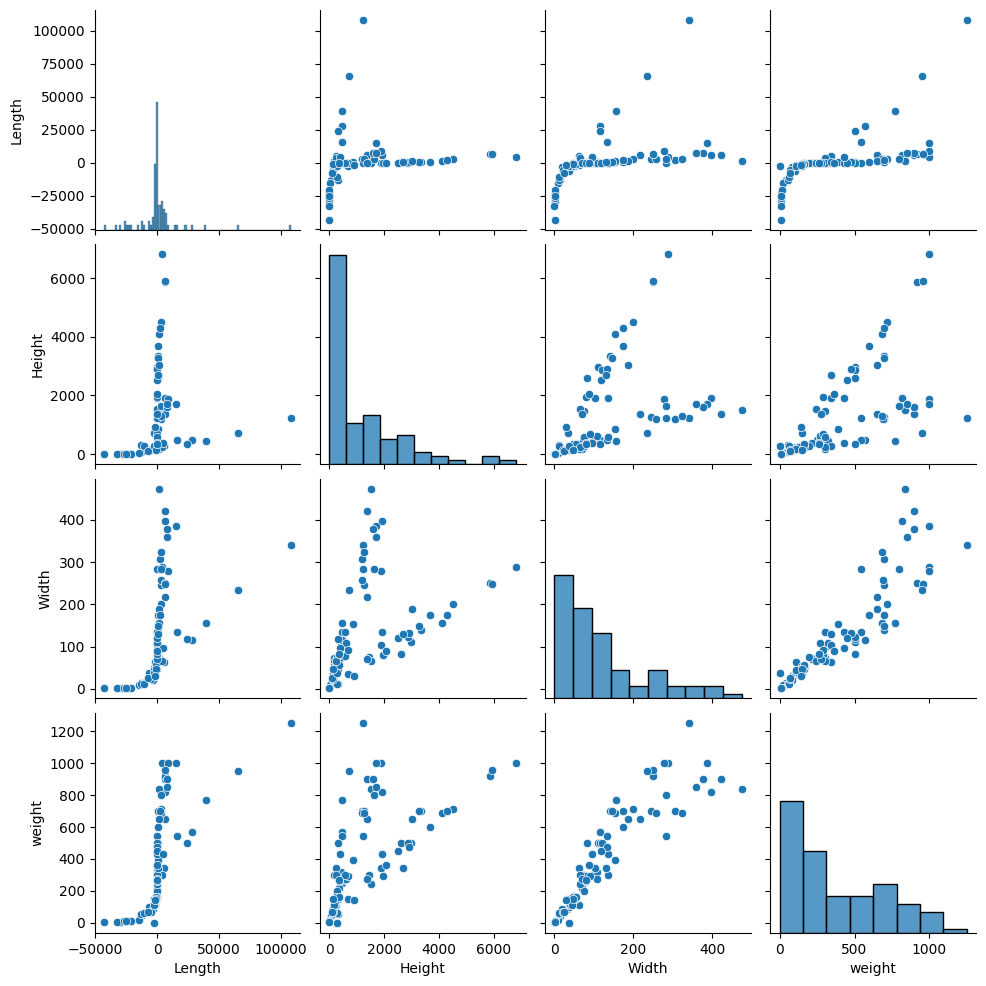

In [ ]:
train_df = X_train_pca.copy()
train_df['weight'] = y_train.copy()
sns.pairplot(train_df)

Введите выборочное среднее колонки <code>Width</code> тренировочного набора данных после возведения в куб.

In [ ]:
print(round(X_train_pca['Width'].mean(), 3))

121.365


In [ ]:
X_train_pca

,Length,Height,Width
24,246.660404,2968.227824,111.604225
72,256.877230,853.320159,153.560114
46,-3019.823898,177.182362,31.993889
55,39099.343371,452.984832,155.373797
36,-22855.688666,10.851106,2.115885
...,...,...,...
35,65718.399109,711.213252,235.022188
79,-8.357202,350.641251,81.464295
49,-1498.974516,922.986233,31.467701
47,10.155149,2062.933417,88.448270


In [ ]:
reg = LinearRegression().fit(X_train_pca, y_train)
y_pred = reg.predict(X_test_pca)
print(round(r2_score(y_test, y_pred), 3))

0.943


### Добавление категориальных признаков

Произведите <code>one-hot</code> кодировние категориального признака `Species`, например, с помощью <code>pd.get_dummies()</code>.

Обучите модель линейной регрессии на полученных тренировочных данных. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

In [ ]:
onehot_fish_train = pd.get_dummies(fish_train['Species'])
onehot_fish_train['Length'] = X_train_pca['Length']
onehot_fish_train['Height'] = X_train_pca['Height']
onehot_fish_train['Width'] = X_train_pca['Width']

onehot_fish_test = pd.get_dummies(fish_test['Species'])
onehot_fish_test['Length'] = X_test_pca['Length']
onehot_fish_test['Height'] = X_test_pca['Height']
onehot_fish_test['Width'] = X_test_pca['Width']

In [ ]:
reg = LinearRegression().fit(onehot_fish_train, y_train)
y_pred = reg.predict(onehot_fish_test)
print(round(r2_score(y_test, y_pred), 3))

0.932


Как можно увидеть, после `one-hot` кодирования признаки стали коррелированы. От этого можно избавиться, например, при помощи параметра `drop_first=True`. Заново обучите модель после исправления этого недочета. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

In [ ]:
onehot_fish_train = pd.get_dummies(fish_train['Species'], drop_first=True)
onehot_fish_train['Length'] = X_train_pca['Length']
onehot_fish_train['Height'] = X_train_pca['Height']
onehot_fish_train['Width'] = X_train_pca['Width']

onehot_fish_test = pd.get_dummies(fish_test['Species'], drop_first=True)
onehot_fish_test['Length'] = X_test_pca['Length']
onehot_fish_test['Height'] = X_test_pca['Height']
onehot_fish_test['Width'] = X_test_pca['Width']

In [ ]:
reg = LinearRegression().fit(onehot_fish_train, y_train)
y_pred = reg.predict(onehot_fish_test)
print(round(r2_score(y_test, y_pred), 3))

0.932


# Задание 3

Используя весь датасет из предыдущего задания как обучающий, выполните предсказания для следующего набора данных. Для успешного выполнения задания необходимо, чтобы ваш результат превысил пороговое значение, равное 0.98. В качестве метрики используется r2_score.

In [ ]:
fish_reserved = pd.read_csv('fish_reserved.csv', sep=',')
fish_reserved

,Species,Length1,Length2,Length3,Height,Width
0,Roach,19.4,21.0,23.7,6.1146,3.2943
1,Perch,19.3,21.3,22.8,6.3840,3.5340
2,Perch,17.2,19.0,20.2,5.6358,3.0502
3,Parkki,17.5,19.0,21.3,8.3922,2.9181
4,Parkki,16.3,17.7,19.8,7.4052,2.6730
5,Perch,22.0,24.0,25.5,7.2930,3.7230
6,Perch,15.0,16.2,17.2,4.5924,2.6316
7,Pike,40.0,42.5,45.5,6.8250,4.4590
8,Bream,27.6,30.0,35.0,12.6700,4.6900
9,Roach,18.6,20.0,22.2,6.2160,3.5742


In [ ]:
X_train = fish_data[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y_train = fish_data['Weight']

In [ ]:
X_train = pd.concat([X_train, pd.get_dummies(fish_data['Species'], drop_first=True)], axis=1, join='inner')

In [ ]:
X_test = pd.concat([fish_reserved[['Length1', 'Length2', 'Length3', 'Height', 'Width']], pd.get_dummies(fish_reserved['Species'], drop_first=True)], axis=1, join='inner')

In [ ]:
X_train['Height'] = np.power(X_train['Height'] + 1, 3)
X_train['Width'] = np.power(X_train['Width'] + 1, 3)
X_train['Length1'] = np.power(X_train['Length1'] + 1, 3)
X_train['Length2'] = np.power(X_train['Length2'] + 1, 3)
X_train['Length3'] = np.power(X_train['Length3'] + 1, 3)
X_test['Height'] = np.power(X_test['Height'] + 1, 3)
X_test['Width'] = np.power(X_test['Width'] + 1, 3)
X_test['Length1'] = np.power(X_test['Length1'] + 1, 3)
X_test['Length2'] = np.power(X_test['Length2'] + 1, 3)
X_test['Length3'] = np.power(X_test['Length3'] + 1, 3)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.9804387151518245

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([ 104.48986099,  133.47033941,   94.33383855,  113.35312471,
         85.652826  ,  177.21073367,   67.86998051,  505.08503621,
        406.11042322,  108.19103346, 1904.1067143 ,  179.97412566,
        639.00025448, 1087.35995952,   37.32045812,  616.85017379,
        126.73104058,  796.57773322, 1492.96675201,   95.30378108,
        607.2606343 ,  194.87817981,   87.64040527,  173.96304946,
        274.73477415,  591.38170848,  362.83237603,   12.24229487,
         27.4566198 ,    4.7935078 , 1027.45159332,  461.36736058,
        549.72336006,  156.99468729,   11.04995776,   71.60725099,
        135.75975723,  903.248628  ,  737.34911747,  144.77645804])